In [2]:
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#print all colors in full, prevent line break
pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False)

In [3]:
iris = datasets.load_iris()
#iris --> datatype: Bunch
#A kind of a dictionary of an array of arrays
print(type(iris))
print(iris.data)
print(iris.target)

<class 'sklearn.utils._bunch.Bunch'>
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7

In [4]:
#splitting the data set into input and output
X = iris.data
y = iris.target

In [5]:
#Total number of values in input
#However, each little array is considered a single datapoint
sum_count = 0
for i in X:
  for j in i:
    sum_count+=1
sum_count

600

In [6]:
#Total number of datapoints in the output
sum_count = 0
for i in y:
  sum_count+=1
sum_count

150

In [7]:
#Number of datapoints in input
n = X.shape[0]
print(n)

150


In [8]:
#Splitting input X and output Y into further training and test data
#The train_test_split function shuffles the dataset and then splits it.
#The test_size parameter determines the proportion of the original dataset to include in the test split
#0.3 means 45 data points i.e. 30%
#The random state hyperparameter in the train_test_split() function controls the shuffling process.
#With random_state=None , we get different train and test sets across different executions and the shuffling process is out of control.
#With random_state=0 , we get the same train and test sets across different executions.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
print(iris.DESCR[:504])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    


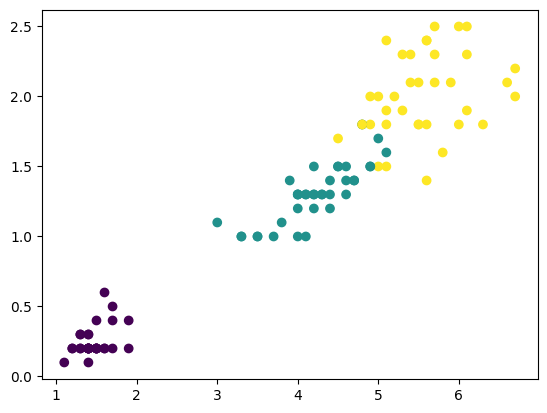

In [10]:
#show two dimensions of the data (petal length and petal width)
plt.scatter(X_train[:, 2], X_train[:, 3], c=y_train)

In [26]:
#y_train==0 gets True for setosa and gives corresponding indexes
#, 2 and , 3 means petal length and petal width columns
print(X_train[y_train==0, 2])
print(X_train[y_train==0, 3])

[1.4 1.4 1.3 1.9 1.9 1.6 1.7 1.5 1.4 1.4 1.7 1.4 1.2 1.5 1.5 1.6 1.4 1.1
 1.5 1.4 1.3 1.4 1.3 1.6 1.3 1.5 1.5 1.4 1.4 1.7 1.2]
[0.2 0.2 0.3 0.4 0.2 0.2 0.5 0.2 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.6 0.2 0.1
 0.2 0.3 0.2 0.3 0.2 0.2 0.3 0.2 0.4 0.1 0.2 0.2 0.2]


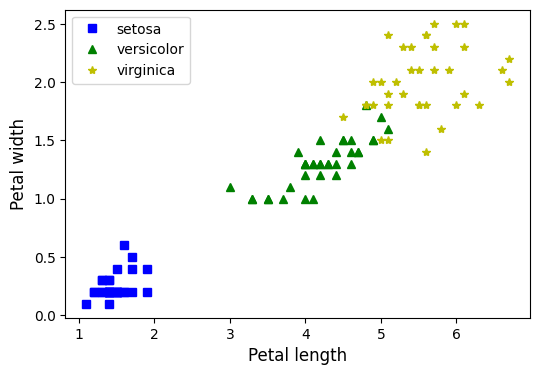

In [29]:
plt.figure(figsize=(6,4))
#plotting petal length and petal width (2, 3) for each y_train value (corresponding to flower types)
plt.plot(X_train[y_train==0, 2], X_train[y_train==0, 3], "bs")
plt.plot(X_train[y_train==1, 2], X_train[y_train==1, 3], "g^")
plt.plot(X_train[y_train==2, 2], X_train[y_train==2, 3], "y*")

plt.xlabel("Petal length", fontsize=12)
plt.ylabel("Petal width", fontsize=12)
plt.legend(['setosa', 'versicolor', 'virginica'])

In [46]:
from sklearn.preprocessing import MinMaxScaler
#normalization is the transformation of features to be on a similar scale.
#This improves the performance and training stability of the mode
#Min Max scaler does the following:
#(X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [48]:
#creating object of a classification model of a support vector machine
clf = svm.SVC()
#train the classifier on the training data
clf.fit(X_train_scaled, y_train)

SVC()

In [49]:
#use the trained model to predict iris types of test data
y_pred = clf.predict(X_test_scaled)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [50]:
#calculating prediction accuracy
#This function computes subset accuracy: the set of labels predicted for a sample
#must exactly match the corresponding set of labels in y_true.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0